In [147]:
import pandas as pd
import numpy as np

In [148]:
data_result = pd.read_csv('/content/cctv_popul_in_seoul.csv')

In [149]:
!pip install koreanize_matplotlib

In [150]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [13]:
data_result.head()

,구별,총 계,16년이전설치,최근 증가율,인구,한국인,외국인,고령자,외국인 비율,고령자 비율,CCTV 비율
0,종로구,2290,230,895.652174,150204,139189,11015,29338,7.333360,19.532103,1.524593
1,용산구,3300,106,3013.207547,219451,206061,13390,39021,6.101590,17.781190,1.503753
2,성동구,4514,542,732.841328,283853,276597,7256,50534,2.556253,17.802877,1.590260
3,광진구,4156,403,931.265509,350005,334159,15846,58307,4.527364,16.658905,1.187412
4,동대문구,3446,1,344500.000000,360066,341345,18721,68503,5.199325,19.025123,0.957047


In [151]:
data_result.set_index(keys='구별', inplace=True)

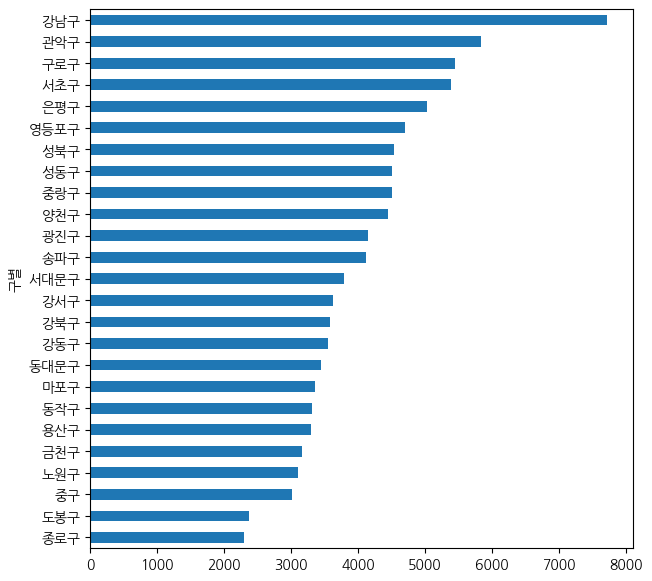

In [152]:
#cctv 갯수를 내림차순으로 정렬한 뒤 막대그래프로 시각화
data_result['총 계'].sort_values(ascending=True).plot(kind='barh',figsize=(7,7));
#horizontal 하면 오름차순 내림차순 방향이 시각적으로 바뀌기도함

In [ ]:
### [more information] matplotlib simple plot example
- https://matplotlib.org/stable/gallery/index.html

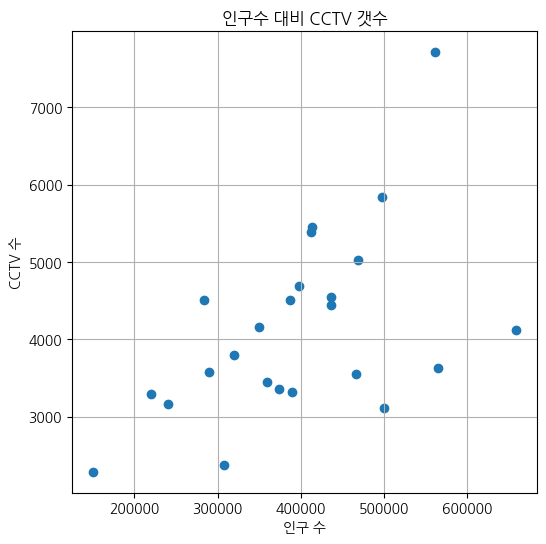

In [24]:
plt.figure(figsize=(6,6))  #matplotlib 기능 위는 pandas 기능
plt.scatter(data_result['인구'],data_result['총 계'])
#options
plt.title("인구수 대비 CCTV 갯수")
plt.xlabel('인구 수')
plt.ylabel('CCTV 수')
plt.grid()

plt.show()

In [28]:
data_result.head()

,총 계,16년이전설치,최근 증가율,인구,한국인,외국인,고령자,외국인 비율,고령자 비율,CCTV 비율
구별,,,,,,,,,,
종로구,2290,230,895.652174,150204,139189,11015,29338,7.333360,19.532103,1.524593
용산구,3300,106,3013.207547,219451,206061,13390,39021,6.101590,17.781190,1.503753
성동구,4514,542,732.841328,283853,276597,7256,50534,2.556253,17.802877,1.590260
광진구,4156,403,931.265509,350005,334159,15846,58307,4.527364,16.658905,1.187412
동대문구,3446,1,344500.000000,360066,341345,18721,68503,5.199325,19.025123,0.957047


In [154]:
from sklearn.linear_model import LinearRegression

In [155]:
# 정답 데이터(Y)와 정답을 도출하기 위한 데이터(X)

x=data_result['인구']
y=data_result['총 계']

In [156]:
# 선형회귀모델 객체 생성
model = LinearRegression()
# 학습
model.fit(x.values.reshape(-1,1),y.values.reshape(-1,1))

LinearRegression()

In [157]:
x.values

array([150204, 131800, 219451, 283853, 350005, 360066, 386782, 436666,
       290252, 308060, 500045, 468976, 320010, 373980, 436595, 565133,
       413099, 240153, 397771, 389541, 497632, 411959, 562136, 658768,
       466924])

In [158]:
x.values.reshape(-1,1) #머신러닝모델한테는 숫자만 일렬로 쫙 펼쳐서 넣어줘야함
#reshape(a,b) a 행 b 열

array([[150204],
       [131800],
       [219451],
       [283853],
       [350005],
       [360066],
       [386782],
       [436666],
       [290252],
       [308060],
       [500045],
       [468976],
       [320010],
       [373980],
       [436595],
       [565133],
       [413099],
       [240153],
       [397771],
       [389541],
       [497632],
       [411959],
       [562136],
       [658768],
       [466924]])

In [159]:
fx = np.linspace(100000,700000,25) #10부터 70까지 그 구간을 24개로 나누어라
len(fx)
len(data_result) #data개수가 왜 다르지? 데이터개수가 1개 줄음

25

In [160]:
fx=fx.reshape(-1,1)

In [161]:
predicted = model.predict(fx)

In [162]:
len(fx), len(predicted)

(25, 25)

In [163]:
#두 data를 같은 모양으로 만드는 과정
#fx.shape
predicted.shape #공란이 아니라 1로 잘나오는데?

(25, 1)

In [164]:
fx_flattened=fx.flatten()
predict_flattened=predicted.flatten()
fx_flattened

array([100000., 125000., 150000., 175000., 200000., 225000., 250000.,
       275000., 300000., 325000., 350000., 375000., 400000., 425000.,
       450000., 475000., 500000., 525000., 550000., 575000., 600000.,
       625000., 650000., 675000., 700000.])

In [165]:
fx_flattened.shape, predict_flattened.shape

((25,), (25,))

In [166]:
model_df= pd.DataFrame({
    "인구수": fx_flattened,
    "예측 CCTV 수" :predict_flattened
})

In [167]:
model_df.head(2)

,인구수,예측 CCTV 수
0,100000.0,2655.276484
1,125000.0,2781.676732


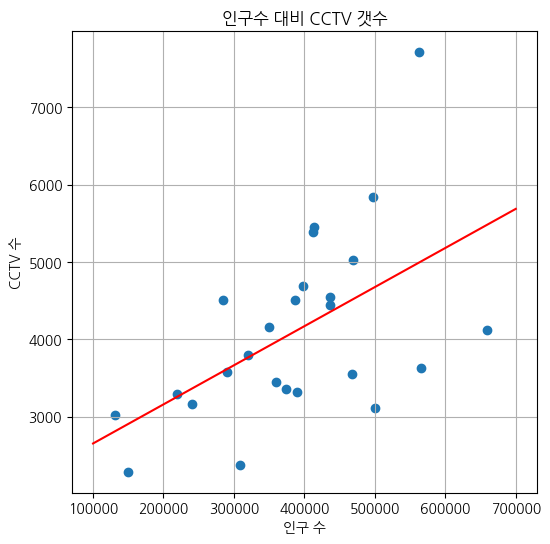

In [168]:
#scatter: 점그래프(숫자,숫자)
#plot: 선그래프(숫자,숫자)
fig, ax=plt.subplots(figsize=(6,6))
ax.scatter(data_result['인구'], data_result['총 계'])
ax.plot(model_df['인구수'],model_df['예측 CCTV 수'],color='red')

plt.title('인구수 대비 CCTV 갯수')
plt.xlabel('인구 수')
plt.ylabel('CCTV 수')
ax.grid()
#ax.set(xlabel=,ylabel=,title=)

plt.show()

In [88]:
#강조하고 싶은 데이터 시각화
# 필요한 2가지 : 실제값 예측값
# 오차 = 실제값-예측값

In [169]:
data_result.head()

,총 계,16년이전설치,최근 증가율,인구,한국인,외국인,고령자,외국인 비율,고령자 비율,CCTV 비율
구별,,,,,,,,,,
종로구,2290,230,895.652174,150204,139189,11015,29338,7.333360,19.532103,1.524593
중구,3021,376,703.457447,131800,121475,10325,26516,7.833839,20.118361,2.292109
용산구,3300,106,3013.207547,219451,206061,13390,39021,6.101590,17.781190,1.503753
성동구,4514,542,732.841328,283853,276597,7256,50534,2.556253,17.802877,1.590260
광진구,4156,403,931.265509,350005,334159,15846,58307,4.527364,16.658905,1.187412


In [170]:
x2=data_result['인구'].values.reshape(-1,1)

In [115]:
x3=model.predict(x2).flatten

In [116]:
x3.shape

AttributeError: 'builtin_function_or_method' object has no attribute 'shape'

In [171]:
data_result['총 계'] - model.predict(x2).flatten()

구별
종로구     -619.108406
중구       204.942400
용산구       40.778074
성동구      929.160923
광진구      236.695754
동대문구    -524.172762
중랑구      406.750877
성북구      185.536878
강북구      -33.192485
도봉구    -1329.229910
노원구    -1566.907976
은평구      506.177197
서대문구      31.350772
마포구     -679.522084
양천구       89.895854
강서구    -1379.993550
구로구     1210.691864
금천구     -193.891443
영등포구     536.190384
동작구     -804.198654
관악구     1176.292176
서초구     1162.455715
강남구     2729.159312
송파구    -1354.413039
강동구     -961.447871
Name: 총 계, dtype: float64

In [172]:
data_result['오차']=data_result['총 계'] - model.predict(x2).flatten()

In [173]:
df_sort_f=data_result.sort_values(by='오차',ascending=False) #내림차순

In [174]:
df_sort_t=data_result.sort_values(by='오차',ascending=True)

In [175]:
data_result.index[0]

'종로구'

In [176]:
from matplotlib.colors import ListedColormap
color_step =['#32a852','#c9b926','#bf4b34',
             '#2f22b5','#ba1bbf','#a61147']

my_map=ListedColormap(color_step)

<ipython-input-177-984d4b577317>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df_sort_f['인구'][i]*1.02,df_sort_f['총 계'][i]*0.98,df_sort_f.index[i],fontsize=12)# (x,y,text) / 숫자를 곱해서 위치를 적절하게 조정가능
<ipython-input-177-984d4b577317>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df_sort_t['인구'][i]*1.02,df_sort_t['총 계'][i]*0.98,df_sort_t.index[i],fontsize=12)


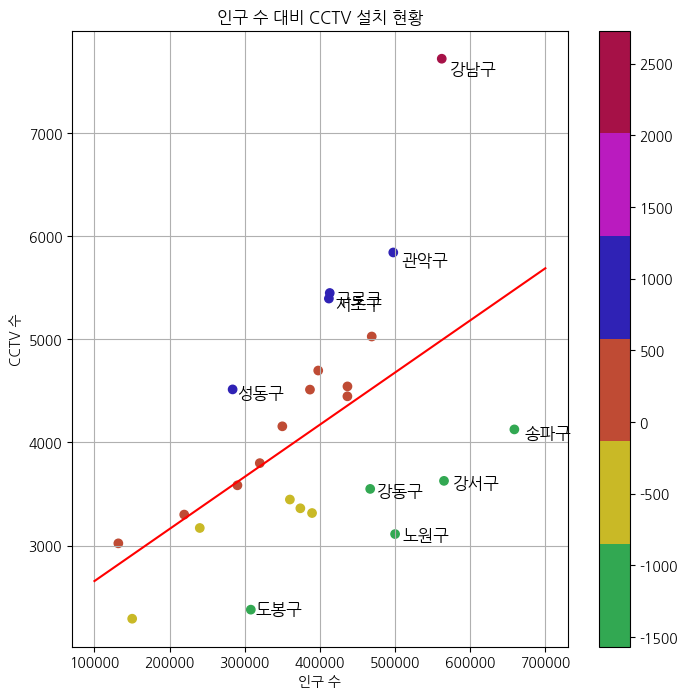

In [177]:
fig, ax=plt.subplots(figsize=(8,8))
result = ax.scatter(data_result['인구'],data_result['총 계'],c=data_result['오차'],cmap=my_map)
ax.plot(model_df['인구수'],model_df['예측 CCTV 수'],color='red')

for i in range(5):
  plt.text(df_sort_f['인구'][i]*1.02,df_sort_f['총 계'][i]*0.98,df_sort_f.index[i],fontsize=12)# (x,y,text) / 숫자를 곱해서 위치를 적절하게 조정가능
  plt.text(df_sort_t['인구'][i]*1.02,df_sort_t['총 계'][i]*0.98,df_sort_t.index[i],fontsize=12)

ax.set(xlabel='인구 수',ylabel='CCTV 수',title='인구 수 대비 CCTV 설치 현황')

plt.colorbar(result)
plt.grid()

plt.show()

In [178]:
# save
data_result.to_csv('seoul_cctv_result.csv', encoding='utf-8')
model_df.to_csv('model_cctv_predict.csv', encoding='utf-8')

In [179]:
my_result=pd.read_csv('seoul_cctv_result.csv',index_col=0)
my_result.head() #구별이 column으로 들어가있음

,총 계,16년이전설치,최근 증가율,인구,한국인,외국인,고령자,외국인 비율,고령자 비율,CCTV 비율,오차
구별,,,,,,,,,,,
종로구,2290,230,895.652174,150204,139189,11015,29338,7.333360,19.532103,1.524593,-619.108406
중구,3021,376,703.457447,131800,121475,10325,26516,7.833839,20.118361,2.292109,204.942400
용산구,3300,106,3013.207547,219451,206061,13390,39021,6.101590,17.781190,1.503753,40.778074
성동구,4514,542,732.841328,283853,276597,7256,50534,2.556253,17.802877,1.590260,929.160923
광진구,4156,403,931.265509,350005,334159,15846,58307,4.527364,16.658905,1.187412,236.695754


In [146]:
a=[True,True,False,False,True]
a.sort()
print(a)

[False, False, True, True, True]
None
